## The sklearn implementation of logistic regression and its results
#### comparing the results of the sklearn implmentaion with my implementation by observing the desicion boundries

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Social_Network_Ads.csv')
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


#### The sklearn's implementation of logistic regression:

In [6]:
alg1=LogisticRegression()
input_data=np.array(df.iloc[:,2:4], dtype=float)
target_data=np.array(df.iloc[:,4], dtype=float)

#scaling the input dataset for efficient working of the algorithm
input_data1=input_data
for i in range(2):
    mean=np.mean(input_data1[:,i])
    std_dev=np.std(input_data1[:,i])
    input_data1[:,i]=(input_data1[:,i]-mean)/std_dev
    
X_train, X_test, Y_train, Y_test=train_test_split(input_data1, target_data)
alg1.fit(X_train, Y_train)

LogisticRegression()

In [7]:
coeff_vector=alg1.coef_
intercept=alg1.intercept_
print(intercept)
print(coeff_vector)
print("score on testing data", alg1.score(X_test, Y_test))
print("score on training data", alg1.score(X_train, Y_train))

[-1.11802966]
[[2.20425261 0.91177643]]
score on testing data 0.84
score on training data 0.8533333333333334


#### My implementation of logistic regression:

In [8]:
def sigmoid(z):
    f=1/(1+np.exp(-z))
    return f

def train(X_train, Y_train):
    X_train=np.array(X_train,dtype=float)
    Y_train=np.array(Y_train,dtype=float)
    
    #never do feature scaling inside a function of a training algorithm, its a data preprossesing task

    row=X_train.shape[0]
    col=X_train.shape[1]
    Y_train=np.reshape(Y_train, (row, 1))
    X_train=np.insert(X_train,col,1,axis=1)
    
    #training the algorithm
    
    #1)initialise the bias_matrix, cost function, grad_matrix, learning rate, sigmoid matrix
    bias_matrix=np.zeros((col+1,1)) # a column matrix with col+1 num of rows
    """
    the sigmoid function returns a np array with 'm' values, each value representing the sigmoid of the dot product of 
    bias_matrix and the ith row of X_train
    """
    X_sig=sigmoid(np.matmul(X_train, bias_matrix))
    cost_func=-(np.sum(Y_train*np.log(X_sig)+(1-Y_train)*np.log(1-X_sig)))/row
    count=0
    grad_matrix=np.transpose(np.matmul(np.transpose(X_sig-Y_train),X_train)/row)
    diff=cost_func
    alpha=.3
    while (diff>.0001):
        """
        1)updating the bias matrix
        2)calculating X_sig: matrix containing the sigmoid of every datapoint
        3)calculate the cost_function
        4)update the gradient matrix
        5)update the diff
        """
        bias_matrix=bias_matrix-alpha*grad_matrix
        X_sig=sigmoid(np.matmul(X_train, bias_matrix))
        cost_func1=cost_func
        cost_func=-(np.sum(Y_train*np.log(X_sig)+(1-Y_train)*np.log(1-X_sig)))/row
        grad_matrix=np.transpose(np.matmul(np.transpose(X_sig-Y_train),X_train)/row)
        diff=np.abs(cost_func-cost_func1)
        plt.scatter(count, cost_func,s=10, c='r')
        count=count+1
    return bias_matrix

[[ 1.98063672]
 [ 0.831199  ]
 [-0.98913296]]


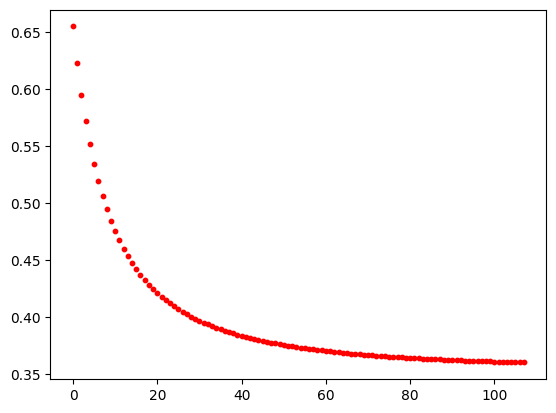

In [9]:
coeff_=train(X_train, Y_train)
print(coeff_)

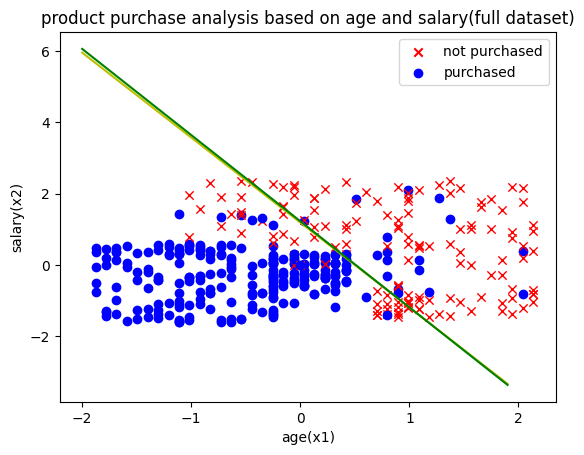

In [15]:
#plotting the desicion boundry wrt to the entire original dataset for my implementation and sklearn's implementation

plt.ylabel('salary(x2)')
plt.xlabel('age(x1)')
plt.title("product purchase analysis based on age and salary(full dataset)")

for i in range(1,400):
    if(target_data[i]==0):
        plt.scatter(input_data1[i,0], input_data1[i,1], marker='o', color='b', linewidth=1)
    if(target_data[i]==1):
        plt.scatter(input_data1[i,0], input_data1[i,1], marker='x', color='r', linewidth=1)

X2=np.arange(-2,2,.1,dtype=float)
plt.plot(X2, -(coeff_[0]*X2+coeff_[2])/coeff_[1], color='y')
plt.plot(X2, -(coeff_vector[0][0]*X2+intercept[0])/coeff_vector[0][1], color='g')
plt.scatter(0,0,color='r',marker='x', label="not purchased")
plt.scatter(0,0,color='b',marker='o', label="purchased")
plt.legend()
plt.show()

#both implementations give nearly the same results not much deviation.